In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import pickle
from sklearn import tree
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [149]:
train_df = pd.read_csv('proyecto_ML/train_modificado.csv',engine='pyarrow')
test_df = pd.read_parquet('proyecto_ML/test.parquet', engine='pyarrow')

In [150]:
X = train_df.drop(['category_price'],axis=1)
y = train_df['category_price']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [152]:
X_train.shape, X_test.shape

((227868, 13), (97659, 13))

In [153]:
X_train = X_train.set_index("", drop=True)


In [154]:
X_test = X_test.set_index("", drop=True)

In [155]:
#GradientBoostingClassifier

gbc_pipe = Pipeline([
    ('pca', PCA(n_components=6)),
    ('scl', StandardScaler()),
    ('core_model', GradientBoostingClassifier())
])

In [156]:
gbc_results = cross_validate(gbc_pipe ,X_train,y_train,return_train_score=True,cv=5)
gbc_results

{'fit_time': array([41.05710864, 39.88087869, 39.37785339, 39.3493495 , 40.33596683]),
 'score_time': array([0.1182127 , 0.08000541, 0.08000112, 0.0810051 , 0.08400154]),
 'test_score': array([0.80745601, 0.80622723, 0.80276035, 0.80516973, 0.80385316]),
 'train_score': array([0.80654876, 0.80836451, 0.80762395, 0.80523876, 0.80554047])}

In [157]:
gbc_pipe.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=6)), ('scl', StandardScaler()),
                ('core_model', GradientBoostingClassifier())])

In [158]:
gbc_pipe.score(X_test, y_test)

0.8070633530959768

In [159]:
accuracies = {}
gbc_predict = gbc_pipe.predict(X_test)
gbc_recall = recall_score(gbc_predict,y_test)
gbc_accuracy = accuracy_score(gbc_predict,y_test)
gbc_precision = precision_score(gbc_predict,y_test)
accuracies['GradientBoostingClassifier'] = gbc_accuracy*100
gbc_accuracy, gbc_precision, gbc_recall


(0.8070633530959768, 0.7976882359295668, 0.7957283562145736)

In [160]:
pkl_filename = "modelos/modelo_gbc.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(gbc_pipe, file)


In [161]:
#DecisionTreeClassifier
dtc_pipe = Pipeline([
			('scl',StandardScaler()),
			('pca', PCA(n_components=6)),
    		('clf', tree.DecisionTreeClassifier(random_state=42))])

In [162]:
dtc_results = cross_validate(dtc_pipe ,X_train,y_train,return_train_score=True,cv=5)
dtc_results

{'fit_time': array([2.16800165, 2.04799986, 2.08000398, 2.15800428, 1.99000454]),
 'score_time': array([0.02499557, 0.02400017, 0.02549267, 0.02399993, 0.02399993]),
 'test_score': array([0.89860447, 0.89954799, 0.89741958, 0.89917276, 0.8967371 ]),
 'train_score': array([0.98564407, 0.98601161, 0.98569344, 0.98561672, 0.98584163])}

In [163]:
dtc_pipe.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=6)),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [164]:
dtc_pipe.score(X_test, y_test)

0.904279175498418

In [165]:
dtc_predict = dtc_pipe.predict(X_test)
dtc_recall = recall_score(dtc_predict,y_test)
dtc_accuracy = accuracy_score(dtc_predict,y_test)
dtc_precision = precision_score(dtc_predict,y_test)
accuracies['DecisionTreeClassifier'] = dtc_accuracy*100
dtc_accuracy, dtc_precision, dtc_recall

(0.904279175498418, 0.8976342227503511, 0.9001234915614099)

In [166]:
matrix = confusion_matrix(y_test, dtc_predict)
matrix

array([[46764,  4610],
       [ 4738, 41547]], dtype=int64)

In [167]:
y_test.value_counts()

0    51374
1    46285
Name: category_price, dtype: int64

In [168]:
pkl_filename = "Modelos/modelo_dtc.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(dtc_pipe, file)

In [169]:
#XGBClassifier
xgbc_pipe = Pipeline([
			('scl',StandardScaler()),
			('pca', PCA(n_components=6)),
    		('clf', XGBClassifier(n_estimators=150,
                            seed=42, use_label_encoder= False))])

c:\Users\matut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [170]:
xgbc_results = cross_validate(xgbc_pipe ,X_train,y_train,return_train_score=True,cv=5)
xgbc_results

c:\Users\matut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\matut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\matut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\matut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\matut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

{'fit_time': array([12.273597  , 11.66199851, 11.76899815, 11.84599829, 12.37300086]),
 'score_time': array([0.06800032, 0.07000041, 0.06499982, 0.06599998, 0.07000089]),
 'test_score': array([0.84517488, 0.83990872, 0.84230043, 0.84552257, 0.8455884 ]),
 'train_score': array([0.8657992 , 0.86177274, 0.86306735, 0.86304616, 0.86623879])}

In [171]:
xgbc_pipe.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=6)),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [172]:
xgbc_pipe.score(X_test, y_test)

0.8453496349542797

In [173]:
xgbc_predict = xgbc_pipe.predict(X_test)
xgbc_recall = recall_score(xgbc_predict,y_test)
xgbc_accuracy = accuracy_score(xgbc_predict,y_test)
xgbc_precision = precision_score(xgbc_predict,y_test)
accuracies['XGBClassifier'] = xgbc_accuracy*100
xgbc_accuracy, xgbc_precision, xgbc_recall

(0.8453496349542797, 0.8342011450793994, 0.8386403127715031)

In [174]:
pkl_filename = "Modelos/modelo_xgbc.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbc_pipe, file)

In [175]:
#RandomForestClassifier
rfc_pipe = Pipeline([
			('scl',StandardScaler()),
			('pca', PCA(n_components=6)),
    		('clf', RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42))])

In [176]:
rfc_results = cross_validate(rfc_pipe ,X_train,y_train,return_train_score=True,cv=5)
rfc_results

{'fit_time': array([26.54969454, 17.52005386, 17.33731699, 17.46999907, 17.28551173]),
 'score_time': array([0.37699485, 0.34899497, 0.35100007, 0.35263324, 0.34857941]),
 'test_score': array([0.91793567, 0.91848422, 0.91767236, 0.91914072, 0.91659535]),
 'train_score': array([0.98562761, 0.98599515, 0.98568247, 0.98561672, 0.98583614])}

In [177]:
rfc_pipe.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=6)),
                ('clf',
                 RandomForestClassifier(n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [178]:
rfc_pipe.score(X_test, y_test)

0.92358103195814

In [179]:
rfc_predict = rfc_pipe.predict(X_test)
rfc_recall = recall_score(rfc_predict,y_test)
rfc_accuracy = accuracy_score(rfc_predict,y_test)
rfc_precision = precision_score(rfc_predict,y_test)
accuracies['RandomForestClassifier'] = rfc_accuracy*100
rfc_accuracy, rfc_precision, rfc_recall

(0.92358103195814, 0.9118072809765583, 0.9258292383292384)

In [180]:
pkl_filename = "Modelos/modelo_rfc.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc_pipe, file)

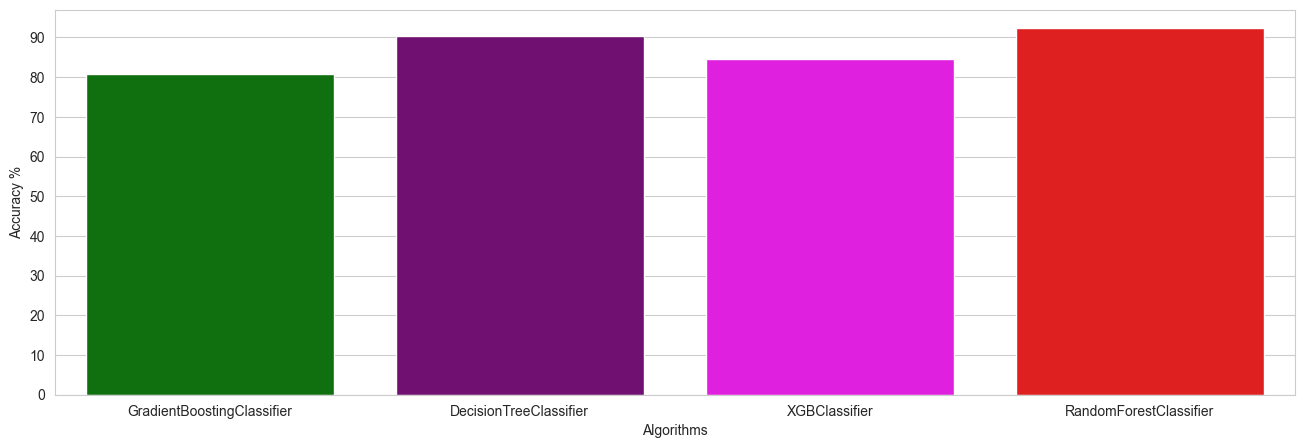

In [181]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=[ "green","purple", "magenta", "red"])
plt.show()

In [182]:
#Validacion
test_df.head(3)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi


In [183]:
test_df.columns

Index(['id', 'url', 'region', 'region_url', 'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'image_url', 'description', 'lat', 'long', 'state'],
      dtype='object')

In [184]:
data_test = test_df.copy()
for i, column in enumerate(list([str(d) for d in data_test.dtypes])):
    if column == "object":
        data_test[data_test.columns[i]] = data_test[data_test.columns[i]].fillna(data_test[data_test.columns[i]].mode())
        data_test[data_test.columns[i]] = data_test[data_test.columns[i]].astype("category").cat.codes
    else:
        data_test[data_test.columns[i]] = data_test[data_test.columns[i]].fillna(data_test[data_test.columns[i]].median())

In [186]:
data_test = data_test[['region','type','sqfeet','beds','cats_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options','parking_options','state']]
data_test.shape

(38498, 12)

In [189]:
result_predict = rfc_pipe.predict(data_test)

In [190]:
resultfinal = pd.DataFrame(result_predict)
resultfinal.to_csv('matiasgarroa.csv',index=False)
